# Stock Price Prediction Example Pipeline

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:


# Load the data
data = pd.read_csv("MSFT.US.csv")

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Display the first few rows of the data
print(data.head())

# Assume the column 'Close' is the target variable we want to predict
# We will create a feature 'Previous_Close' which is the 'Close' value of the previous day
data['Previous_Close'] = data['Close'].shift(1)

# Drop the first row since it will have a NaN value in 'Previous_Close'
data = data.dropna()

# Define the feature and target variable
X = data[['Previous_Close']]
y = data['Close']
dates = data['Date']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, test_size=0.2, random_state=42, shuffle=False)

        Date     Open     High      Low    Close  Adjusted_close      Volume
0 1986-03-13  25.4880  29.2608  25.4880  27.9936          0.0601  1031788800
1 1986-03-14  27.9936  29.4912  27.9936  29.0016          0.0623   308160000
2 1986-03-17  29.0016  29.7504  29.0016  29.4912          0.0633   133171200
3 1986-03-18  29.4912  29.7504  28.5120  28.7424          0.0617    67766400
4 1986-03-19  28.7424  29.0016  27.9936  28.2528          0.0606    47894400


In [3]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

[ 57.1998628   57.1201001   56.93066368 ... 423.44028091 422.77226828
 426.78034407]
Root Mean Squared Error (RMSE): 3.8713363621627326


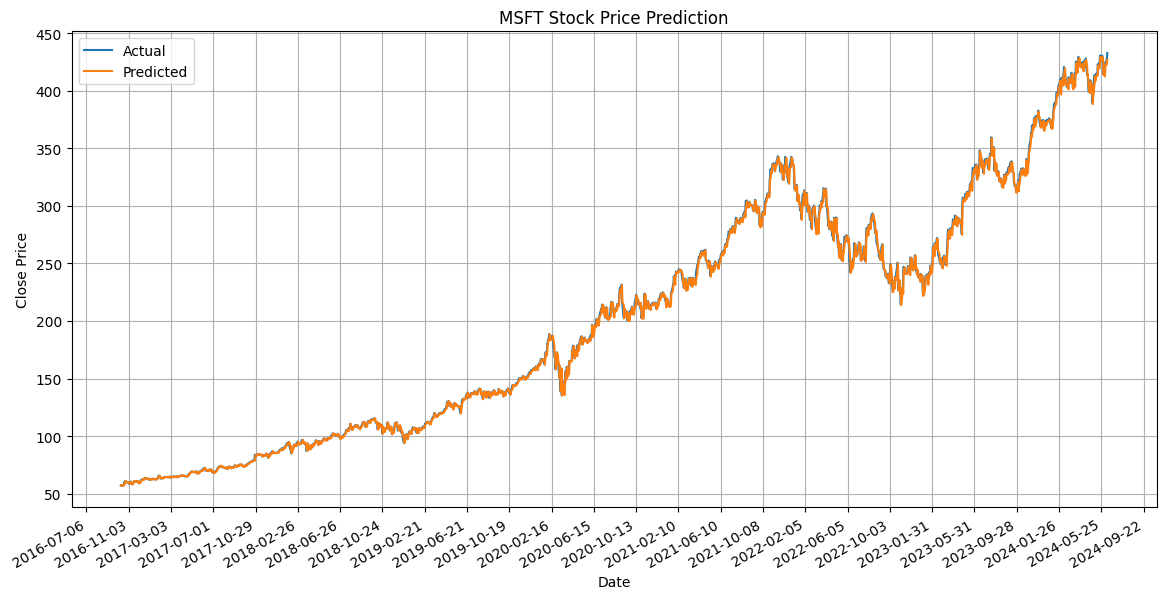

In [4]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(dates_test, y_test, label='Actual')
plt.plot(dates_test, y_pred, label='Predicted')

# Format the date on the x-axis
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=120))  # Set major ticks every 10 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()  # Rotate date labels vertically

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('MSFT Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()